In [ ]:
#imports
!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 64 kB 1.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=06b958d21ec4e942c5d4869b39594a756ec7898f07532bf8746b4608bedb54bd
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

In [ ]:
df= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

FileNotFoundError: ignored

In [ ]:
df.shape

(253680, 22)

In [ ]:
# Checking for missing values
df.isna().sum().sum()

0

In [ ]:
# Checking how imbalance our target column is
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
print(f'Percentage of No Heart Disease/Attack: {round(df["HeartDiseaseorAttack"].value_counts()[0] / len(df) * 100, 2)}%')
print(f'Percentage of Heart Disease/Attacks:   {round(df["HeartDiseaseorAttack"].value_counts()[1] / len(df) * 100, 2)}%')

Percentage of No Heart Disease/Attack: 90.58%
Percentage of Heart Disease/Attacks:   9.42%


In [ ]:
# Let's draw some graphs and understand our dataset a little bit
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


(22.5, 0.0)

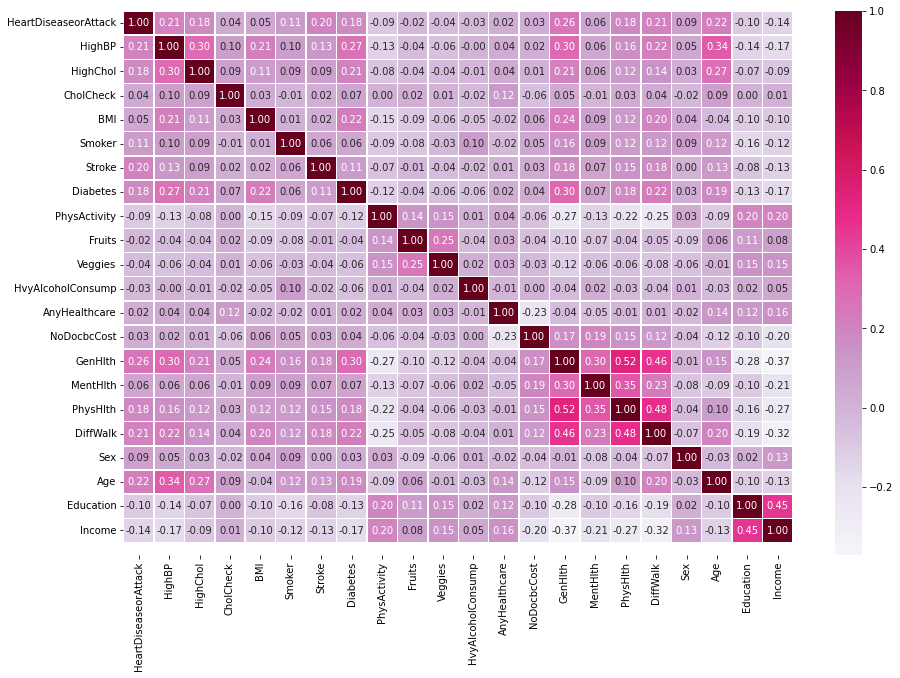

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='PuRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

In [ ]:
# Let's make the models for our data
# Defining our X and y and splitting them into a training set and a testing set

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The 3 models I've chosen for this dataset

models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}


def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    """
    A function to fit and evaluate the specified ML models
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)
model_scores

{'KNN': 0.8948675496688742,
 'Logistic Regression': 0.9068314411857458,
 'Random Forest': 0.9027317880794702}

In [ ]:
# I'm not quite satistifed with the scores, let's adjust the hyperparameters to see how the models perform
# Creating a grid for the LogisticRegression hyperparameters
logistic_grid = {'C': np.logspace(-4, 4, 20),
                 'solver': ['liblinear']}

# Creating a grid for the RandomForestClassifier hyperparameters
random_forest_grid = {'n_estimators': np.arange(10, 250, 50),
                      'max_depth': [None, 3, 5, 10],
                      'min_samples_split': np.arange(2, 10, 2),
                      'min_samples_leaf': np.arange(1, 10, 2)}

# Using RandomSearchCV to search for random hyperparameters in LogisticRegression
rs_logistic_reg = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions=logistic_grid,
                                     cv=5,
                                     n_iter=20,
                                     verbose=True)

# Fit the model using the new search hyperparams
rs_logistic_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# Checking the best parameters for Logistic Regression
rs_logistic_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [ ]:
# Let's check the (Hopefully improved) performance
rs_logistic_reg.score(X_test, y_test)


In [ ]:
# Using RandomSearchCV to search for random hyperparameters in RandomForestClassifier
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=random_forest_grid,
                                      cv=5,
                                      n_iter=5,
                                      verbose=True)

# Fit the model using the new search hyperparams
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210])},
                   verbose=True)

In [ ]:
# Checking the best parameters for RandomForestRegression
rs_random_forest.best_params_


{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 210}

In [ ]:
# Not much improvement for either models
rs_random_forest.score(X_test, y_test)

0.9068511510564491

In [ ]:
logistic_reg_grid = {'C': np.logspace(-4,4,20),
                     'solver': ['liblinear']}

gs_logistic_reg = GridSearchCV(LogisticRegression(),
                               param_grid=logistic_reg_grid,
                               cv=5,
                               verbose=True)

gs_logistic_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_logistic_reg.best_params_


{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [ ]:
gs_logistic_reg.score(X_test, y_test)


0.9069102806685588

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



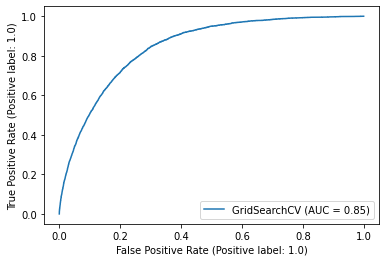

In [ ]:
# Let's plot a ROC curve which is the comparison of TPR (True Positive Rate) VS FPR (False Positive Rate)

plot_roc_curve(gs_logistic_reg, X_test, y_test);


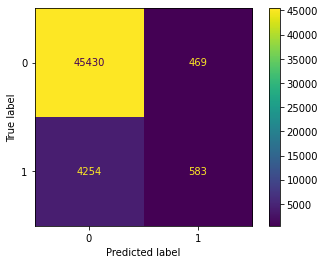

In [ ]:
# Let's experiment with the confusion matrix
y_preds = gs_logistic_reg.predict(X_test)
cm = confusion_matrix(y_test, y_preds, labels=gs_logistic_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis');

In [ ]:
# Let's make a Classification report which gives us a combination of evaluation metrics such as (Precision, Recall, F1-score, Support)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45899
         1.0       0.55      0.12      0.20      4837

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.57     50736
weighted avg       0.88      0.91      0.88     50736



In [ ]:
gs_logistic_reg.best_params_


{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [ ]:
# Creating a new model based on the best params
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

In [ ]:
# To see a list of scoring parameters, you could do 'sklearn.metrics.SCORERS.keys()'
params = ['accuracy', 'precision', 'recall', 'f1']
def scoring_params(params):
    for metric in params:
        cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=5, scoring=f'{metric}'))
        print(f'{metric}: {cv_accuracy:.3f}')
    
scoring_params(params)

accuracy: 0.908
precision: 0.542
recall: 0.125
f1: 0.203


In [ ]:
# Let's see which features are the most important for our model
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [ ]:
features = dict(zip(df.columns, list(clf.coef_[0])))
features

{'Age': 0.004567972916650772,
 'AnyHealthcare': 0.24615338140901993,
 'BMI': 0.3644488075156515,
 'CholCheck': -0.00044731962419770015,
 'Diabetes': 0.02923274870291171,
 'DiffWalk': 0.7449618283150086,
 'Education': -0.04605248698881304,
 'Fruits': 0.026957572315310672,
 'GenHlth': 0.00206461507553016,
 'HeartDiseaseorAttack': 0.5300664625104052,
 'HighBP': 0.6101779540501541,
 'HighChol': 0.3173448682953087,
 'HvyAlcoholConsump': -0.03796847853697438,
 'MentHlth': 0.0017939189825413478,
 'NoDocbcCost': 0.4777947004001756,
 'PhysActivity': 0.017417522618205686,
 'PhysHlth': 0.28214445855779796,
 'Sex': 0.24960296754329342,
 'Smoker': 0.9912729135594018,
 'Stroke': 0.15372989746926932,
 'Veggies': -0.29030653290161157}

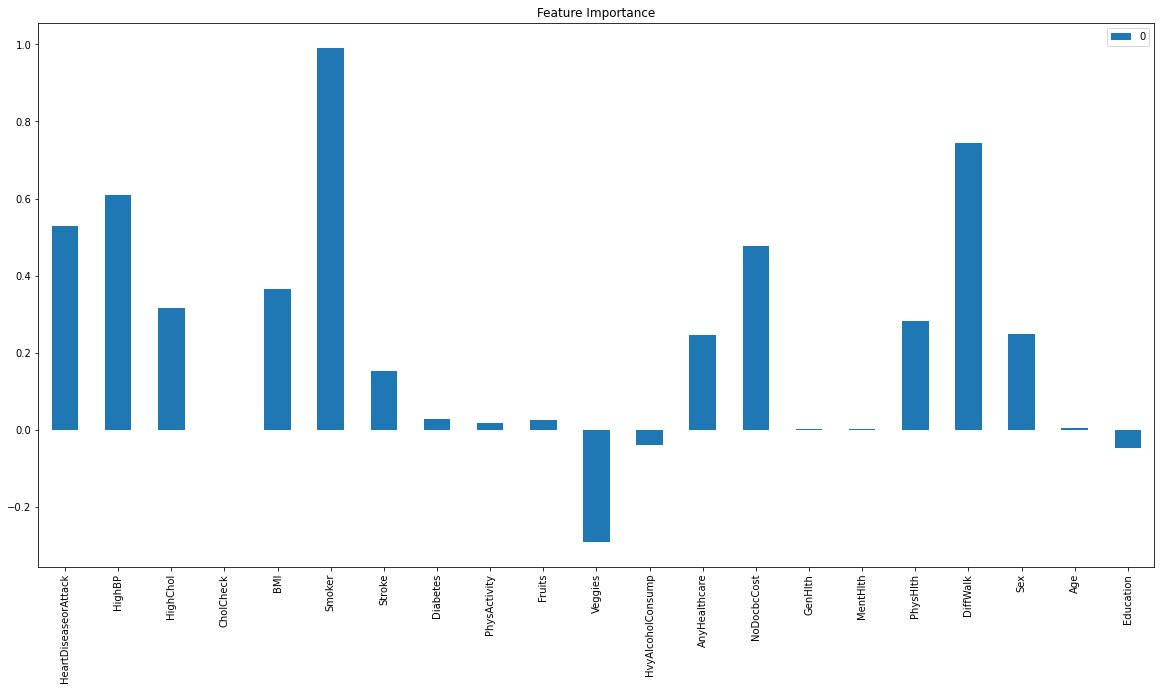

In [ ]:
# Let's visualize the data
features_df = pd.DataFrame(features, index=[0]).T.plot.bar(figsize=(20,10), title='Feature Importance')

In [ ]:
import tensorflow as tf 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# set seed to avoid changing results : 

tf.random.set_seed(42)

# Create a deep learning model consist of : = > * 3 hidden layers * 4 Hidden units * Set activation of "relu" ,"Sigmoid"
# set optimizer "Adam with it's defult learning rate 0.001 "

model = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])

# model compile : 

model.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

# Fit the model on data : 

history = model.fit(X_train,y_train,epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2538 - accuracy: 0.9061
Epoch 2/100
6342/6342 [==============================] - 11s 2ms/step - loss: 0.2397 - accuracy: 0.9061
Epoch 3/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2381 - accuracy: 0.9061
Epoch 4/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2374 - accuracy: 0.9068
Epoch 5/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2372 - accuracy: 0.9079
Epoch 6/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2371 - accuracy: 0.9080
Epoch 7/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2370 - accuracy: 0.9081
Epoch 8/100
6342/6342 [==============================] - 11s 2ms/step - loss: 0.2369 - accuracy: 0.9080
Epoch 9/100
6342/6342 [==============================] - 11s 2ms/step - loss: 0.2369 - accuracy: 0.9082
Epoch 10/100
6342/6342 [==============================] - 11s 2m

Text(0.5, 0, 'accuracy')

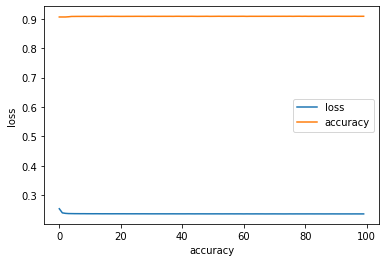

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("accuracy")

In [ ]:
model.evaluate(X_test,y_test)



1586/1586 [==============================] - 3s 2ms/step - loss: 0.2391 - accuracy: 0.9074


[0.23910431563854218, 0.9073635935783386]

In [ ]:
# set seed to avoid changing results : 

tf.random.set_seed(42)

# Create a deep learning model consist of : = > * 3 hidden layers * 4 Hidden units * Set activation of "relu" ,"Sigmoid"
# set optimizer "Adam with it's defult learning rate 0.001 "

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])

# model compile : 

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

# Fit the model on data : 

history_2 = model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



6342/6342 [==============================] - 13s 2ms/step - loss: 0.2484 - accuracy: 0.9064
Epoch 2/100
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2377 - accuracy: 0.9080
Epoch 3/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2369 - accuracy: 0.9081
Epoch 4/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2366 - accuracy: 0.9081
Epoch 5/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2364 - accuracy: 0.9082
Epoch 6/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2364 - accuracy: 0.9083
Epoch 7/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2364 - accuracy: 0.9083
Epoch 8/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2363 - accuracy: 0.9081
Epoch 9/100
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2363 - accuracy: 0.9083
Epoch 10/100
6342/6342 [==============================] - 13s 2ms/step - los

In [ ]:
model_2.evaluate(X_test,y_test)


1586/1586 [==============================] - 2s 1ms/step - loss: 0.2385 - accuracy: 0.9074


[0.23849545419216156, 0.9073635935783386]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Now we need to know the best K value "Lowest error rate for created loop"

test_error_rate = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors = k )
    knn_model.fit(X_train , y_train)
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test , y_pred)
    
    test_error_rate.append(error)

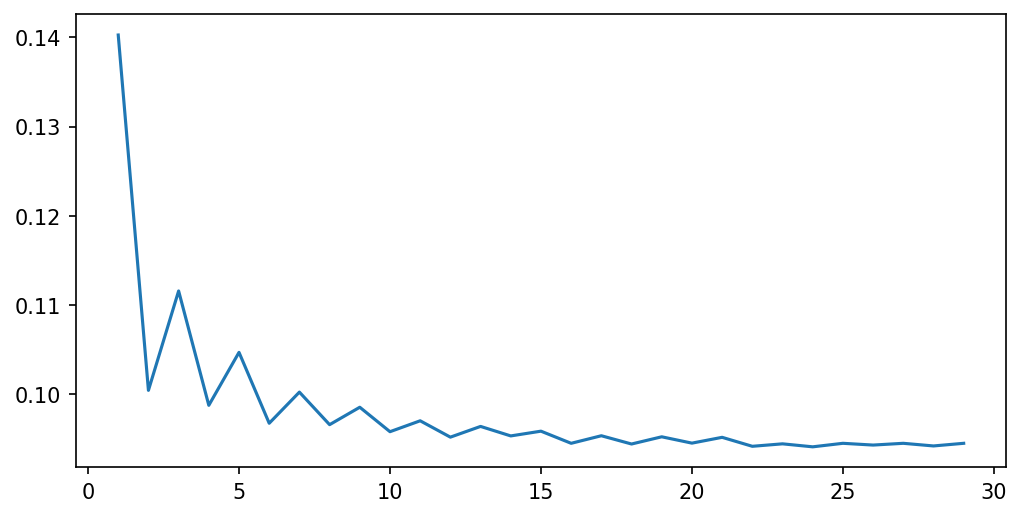

In [ ]:
# Lowest error rate is 18 , so this is the k value :
plt.figure(figsize=(8,4),dpi = 150)
plt.plot(range(1,30),test_error_rate)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
# Now we are going to define function contain all needed metrixes , that will need it to know the model accuracy 

from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report

def metrics(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model , X_test , y_test)
    plot_roc_curve(model , X_test , y_test)
    plot_precision_recall_curve(model , X_test , y_test)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45899
         1.0       0.53      0.08      0.14      4837

    accuracy                           0.91     50736
   macro avg       0.72      0.54      0.55     50736
weighted avg       0.87      0.91      0.87     50736



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

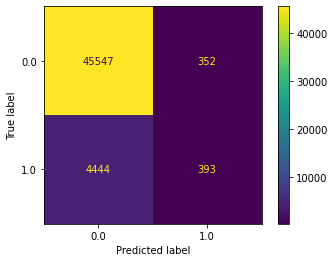

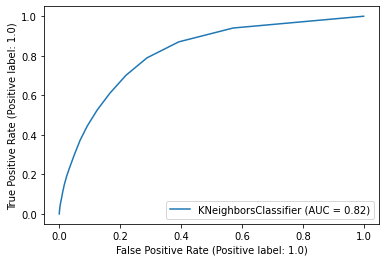

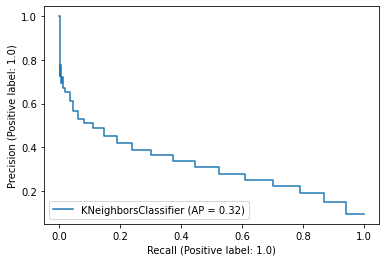

In [ ]:
metrics(knn_model)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45899
         1.0       0.55      0.13      0.22      4837

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

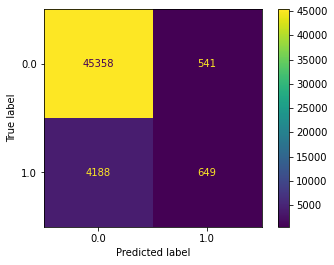

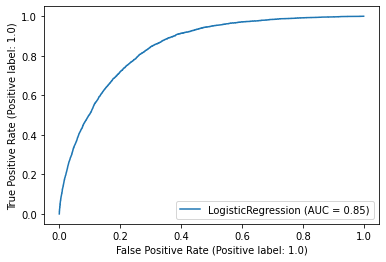

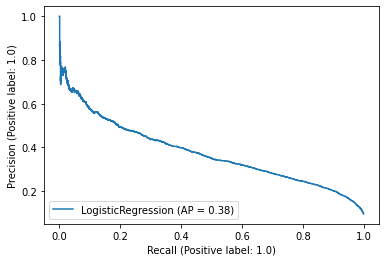

In [ ]:
# Create logisticRegression model and fit it on scaled X train 
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
metrics(lg_model)

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45899
         1.0       0.25      0.28      0.26      4837

    accuracy                           0.85     50736
   macro avg       0.59      0.59      0.59     50736
weighted avg       0.86      0.85      0.86     50736



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

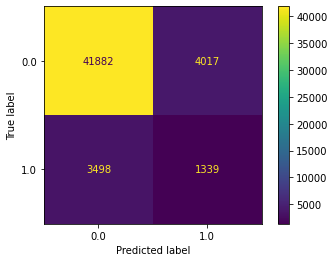

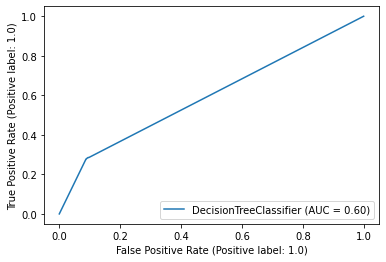

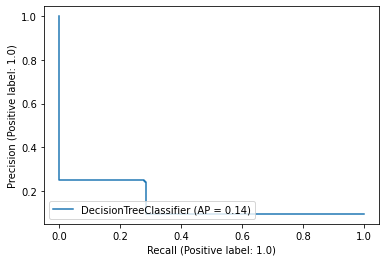

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train , y_train)
y_pred = tree_model.predict(X_test)
metrics(tree_model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45899
         1.0       0.59      0.05      0.10      4837

    accuracy                           0.91     50736
   macro avg       0.75      0.53      0.53     50736
weighted avg       0.88      0.91      0.87     50736



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

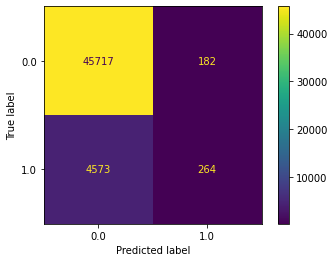

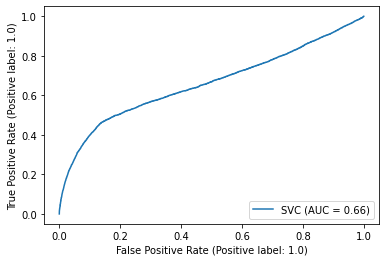

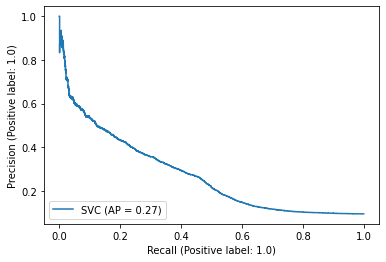

In [ ]:
# SVM
svm_model=SVC()
svm_model.fit(X_train, y_train)
svm_Y_predict_test = svm_model.predict(X_test)
metrics(svm_model)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45899
         1.0       0.39      0.11      0.18      4837

    accuracy                           0.90     50736
   macro avg       0.65      0.55      0.56     50736
weighted avg       0.86      0.90      0.87     50736



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

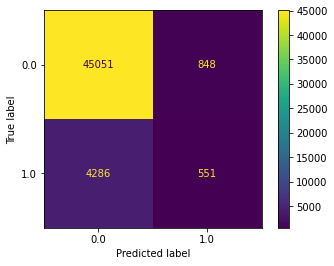

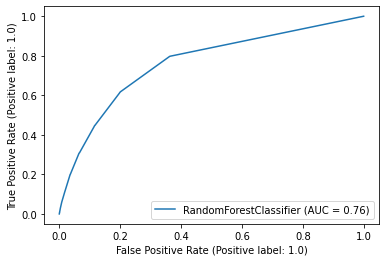

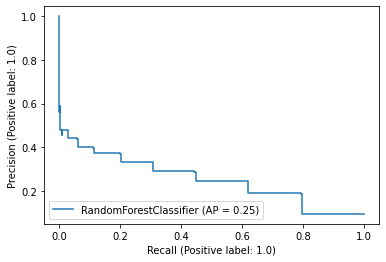

In [ ]:
# RainForestClassifier model

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)
rf_y_predict = rfc.predict(X_test)
metrics(rfc)